# Contenuti
- [Scikit-learn](#Scikit-learn)
- [Import delle librerie](#Import-delle-librerie)
- [Dataset](#Dataset)
- [Train test split](#Train-test-split)
- [Classificazione](#Classificazione)
- [Esercizio 1](#Esercizio-1)
- [Matrice di confusione](#Matrice-di-confusione)
- [Esercizio 2](#Esercizio-2)
- [Problemi Multi-classe](#Problemi-Multi-classe)
- [Esercizio 2 (cont'd)](#Esercizio-2-(cont'd))
- [Esercizio 3](#Esercizio-3)

# Scikit-learn
Nell'esercitazione odierna e nelle successive si vedranno in dettaglio gli algoritmi di Machine Learning, sia supervisionato che non. A tal fine verrà utilizzata la libreria **Scikit-learn** per Python che mette a disposizione numerose classi e funzionalità specifiche per il Machine Learning. Oltre a rendere disponibili i più comuni algoritmi per la classificazione, regressione e clustering, sono presenti anche diverse funzionalità per la manipolazione dei dati.

La popolarità di Scikit-learn è dovuta principalmente alla sua facilità d'uso, all'integrazione con la libreria Numpy e alla possibilità di parametrizzare le operazioni messe a disposizione, pur mantenendo una API semplice.

Per una lista completa delle funzionalità si rimanda alla [documentazione ufficiale](https://scikit-learn.org/stable/index.html).

# Import delle librerie
Per prima cosa è necessario eseguire l'import delle librerie utilizzate durante l'esecitazione. Il package della libreria Scikit-learn è denominato **sklearn**. Dal package è possibile caricare solamente i moduli necessari. Per questa esercitazione useremo un semplice classificatore fittizio (dummy) e i moduli per la valutazione delle prestazioni del classificatore (model_selection e metrics).

In [1]:
# Moduli di scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.dummy import DummyClassifier

# Dataset
Il dataset che useremo per questa esercitazione è ancora derivato dal codice prodotto nelle esercitazioni precedenti. Anche per chi le avesse svolte con successo, si consiglia di usare la soluzione proposta dal docente e presente sul materiale del team del corso (file *generazione.py*), in modo da lavorare tutti sugli stessi dati.

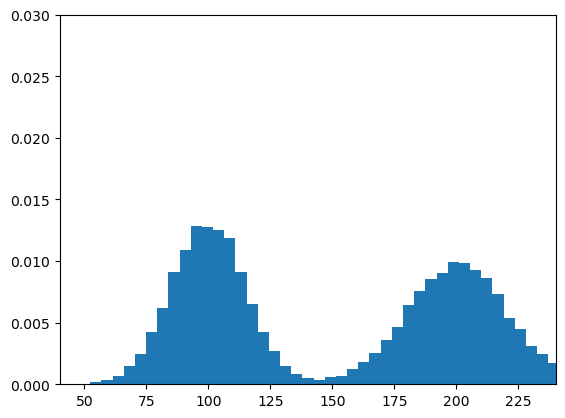

In [3]:
from generazione import genera_dataset
import numpy as np
import matplotlib.pyplot as plt

#con questo comando speciale per IPython permettiamo di inserire i plot inline
%matplotlib inline  

c = 2                      #2 classi (definiamo due Gaussiane) 
n = 10000                  #da 10000 record
mu = [100,200]             #con valore medi abbastanza separati spazialmente
sigma = [15, 20]           #e con una differente pendenza
x, y = genera_dataset(2, n, 'gaussian', mu, sigma)

#solamente per mostrare il dateset finale
plt.hist(x, bins=50, density=True)
plt.axis([40, 240, 0, 0.03])
plt.show()

# Train test split
Il dataset caricato può essere suddiviso in due parti: training e test set. Attraverso il test set sarà possibile testare il classificatore addestrato sul training set. Questa procedura consente di simulare le prestazioni di un modello su dati nuovi/non visti. 

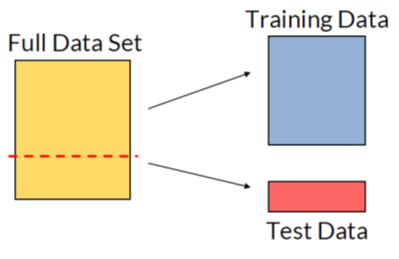 

Visto che in Machine Learning è comune eseguire tale operazione, la libreria Scikit-learn mette a disposizione una apposita funzione, [**train_test_split(...)**](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html), che permette di separare un dataset in due parti. Ecco come funziona la procedura.

0. Assicuratevi che i vostri dati siano disposti in un formato accettabile per il train test split. In scikit-learn, questo consiste nel separare il dataset completo in features e labels. NB nel nostro caso features e labels sono già separate (x e y). 
1. Dividere il set di dati in due parti: un set di allenamento e un set di test. Questo consiste nel selezionare casualmente circa il 75% (si può variare) dei record e inserirli nel training set, mentre il restante 25% viene inserito nel test set.
2. Addestrare il modello sul set di addestramento, "X_train" e "y_train". 
3. Testare il modello sul set di test "X_test" e "y_test" e valutare le prestazioni. 

Il parametro *test_size* descrive la percentuale di record che dovrà essere contenuta nella seconda parte. Come configurazione predefinita **train_test_split(...)** mescola i pattern al fine di evitare che i dataset restituiti contengano pattern appartenenti solamente a un sottoinsieme delle classi.

In [4]:
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state=0, test_size=0.25)
print('Shape training set:', train_x.shape)
print('Shape validation set:', test_x.shape)

Shape training set: (15000,)
Shape validation set: (5000,)


Il parametro *random_state* è un numero pseudo-casuale che consente di riprodurre la stessa identica divisione train-test ogni volta che si esegue il codice. Ci sono molte ragioni per cui si usa random_state, tra cui i test del software, le esercitazioni (come questa) e le conferenze. Tuttavia, si consiglia di rimuoverlo se si sta cercando di vedere quanto bene un modello generalizza a nuovi dati.

# Classificazione
Di seguito vengono descritte le operazioni necessarie per creare e addestrare un classificatore. Uno dei punti di forza della libreria Scikit-learn è la sua facilità d'uso e l'uniformità delle chiamate alla libreria: si noti come queste operazioni necessitino solamente di due linee di codice.

In [5]:
# Creazione di un classificatore
dummy_clf = DummyClassifier(strategy='most_frequent')

Nell'esempio, il classificatore creato è un [**DummyClassifier(...)**](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html) la cui strategia è quella di assegnare ad ogni pattern la classe più numerosa nel training set. DummyClassifier non può essere definito come un vero classificatore in quanto fa previsioni che ignorano le caratteristiche di input ma serve come semplice linea di base da confrontare con altri classificatori più complessi.

Il comportamento specifico di questo classificatore viene selezionato con il parametro 'strategy', ma tutte le strategie fanno previsioni che ignorano i valori delle caratteristiche in ingresso passati come argomento X. Le previsioni, tuttavia, dipendono tipicamente dai valori osservati nel parametro y passato al fit.

Il classificatore (*estimator* nel lessico di Scikit-learn) può essere addestrato tramite il metodo **.fit(...)** che prende in input un insieme di record etichettati X,y. I record (X) sono memorizzati per righe in un Numpy array bidimensionale mentre le etichette (y) in un Numpy array monodimensionale.

N.B.: la notazione X (maiuscolo) e y (minuscolo) è normalmente utilizzata in Scikit-learn per indicare un set di record (X) e le rispettive etichette (y).

In [6]:
# Addestramento
dummy_clf.fit(train_x, train_y)

DummyClassifier(strategy='most_frequent')

Possiamo verificare i parametri del nostro classificatore tramite il metodo **get_params()**. 

In [7]:
dummy_clf.get_params()

{'constant': None, 'random_state': None, 'strategy': 'most_frequent'}

Una volta addestrato, un classificatore può essere utilizzato per riconoscere la classe di uno o più pattern. Per fare ciò, si può utilizzare il metodo **.predict(...)** passando come parametro una lista di pattern. Il risultato che si ottiene è una lista delle label predette dal classificatore.

In [8]:
# Uso della funzione .predict(...)
pred_y = dummy_clf.predict(test_x)
# Per verificare il valore delle predizioni ne mostriamo un sotto-insieme
print('Classi predette:', pred_y[0:10])
print('Classi reali:', test_y[0:10])

Classi predette: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Classi reali: [1. 0. 1. 1. 0. 0. 0. 1. 1. 0.]


Attraverso il metodo **.predict_proba(...)**, che prende in input sempre una lista di pattern, è possibile verificare con quale valore di probabilità i pattern sono classificati come appartenenti ad una classe o ad un'altra. Il risultato che si ottiene quindi non è più una lista di label ma una matrice con *c* colonne (pari al numero di classi). in questo caso il valore di probabilità coincide con il valore delle label predette dal classificatore.

In [9]:
# Uso della funzione .predict_proba(...)
pred_prob_y = dummy_clf.predict_proba(test_x)
# Per verificare il valore delle predizioni ne mostriamo un sotto-insieme
print('Classi predette:', pred_prob_y[0:10])

Classi predette: [[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In Scikit-learn è possibile misurare l'accuratezza di un classificatore su un determinato dataset richiamando il metodo **.score(...)** che prende in input un insieme di pattern etichettati X,y. Internamente il metodo classifica ogni singolo pattern di X e verifica se l'etichetta assegnata corrisponde alla corrispondente *entry* in y.

In [10]:
# Uso della funzione .score(...)
print('Accuratezza sul training set: %.3f' % dummy_clf.score(train_x, train_y))
print('Accuratezza sul validation set: %.3f' % dummy_clf.score(test_x, test_y))

Accuratezza sul training set: 0.502
Accuratezza sul validation set: 0.495


## Esercizio 1
Si implementino le funzioni **compute_accuracy(...)** e **error_rate()** in grado di calcolare rispettivamente l'accuratezza e l'errore di un classificatore su un insieme di pattern etichettati X,y.

In [11]:
#Scrivi qui la soluzione
def compute_accuracy(X,y):
    return (dummy_clf.score(X,y))
def error_rate(X,y):
    return 1-compute_accuracy(X,y)
print(compute_accuracy(train_x,train_y))
print(error_rate(train_x,train_y))

0.5015333333333334
0.4984666666666666


# Matrice di confusione
Scikit-learn mette a disposione delle funzione per il calcolo delle prestazioni dei modelli e tra queste vi è la funzione per il calcolo della matrice di confusione, che può essere eseguito con [**confusion_matrix(...)**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) che accetta in input una serie di parametri, tra questi quelli obbligatori sono la lista di label reali *y_true* e la lista di label predette dal classificatore *y_pred*. 

In [12]:
#calcoliamo la matrice di confusione per le predizioni del dummy classifier
confusion_matrix(test_y, pred_y)

array([[2477,    0],
       [2523,    0]])

Questa funzione può essere usata anche per labels con valori categorici (non numerici), come mostrato nell'esempio seguente.

In [13]:
y_true = ["cat", "ant", "cat", "cat", "ant", "ant"]
y_pred = ["ant", "cat", "cat", "cat", "ant", "cat"]
confusion_matrix(y_true, y_pred)

array([[1, 2],
       [1, 2]])

In certi casi potrebbe essere necessario specificare il vettore delle labels, utilizzato dalla funzione *confusion_matrix* per indicizzare la matrice. Se viene inserito None o se non viene specificato, vengono utilizzate quelle che compaiono almeno una volta in y_true o y_pred nell ordine in cui compaiono. Può essere utilizzato per riordinare o selezionare un sottoinsieme di etichette o per inserire le etichette che per varie ragioni non campaiono mai nel test set

In [14]:
#notate come le due istruzioni producono risultati differenti
cm1 = confusion_matrix(y_true, y_pred, labels=["ant", "cat"])
cm2 = confusion_matrix(y_true, y_pred, labels=["cat", "ant"])
print(cm1)
print()
print(cm2)

[[1 2]
 [1 2]]

[[2 1]
 [2 1]]


## Esercizio 2
Si implementino le ulteriori metriche, viste durante le lezioni teoriche, per il calcolo delle metriche a partire dalla matrice di confusione in un problema di classificazione binario. Quindi verificate le prestazioni del classificatore *Dummy*.

In [28]:
#Scrivi qui la soluzione
def analysis(cm):
    TP, FN, FP , TN = (cm[0,0],cm[0,1],cm[1,0],cm[1,1])
    tpr = TP/(TP+FN)
    tnr = TN/(TN+FP)
    fpr = FP/(TN+FP)
    fnr = FN/(TP+FN)
    p = TP/(FP+TP)
    f = (2 * tpr * p) / (p + tpr)
    return(tpr,tnr,fpr,fnr,p,f)

a= analysis(cm1)
print("TPR=%.3f, TNR=%.3f, FPR=%.3f, FNR=%.3f, p=%.3f, f=%.3f" % (a))


TPR=0.333, TNR=0.667, FPR=0.333, FNR=0.667, p=0.500, f=0.400


# Problemi Multi-classe
Consideriamo adesso il seguente problema multi-classe per la classificazione di animali ("ant", "bird", "cat") e supponiamo di aver addestrato un classificatore (usando un insieme di record di esempio) il quale ha fornito le seguenti predizioni, che, confrontate con le label reali, definiscono la seguente matrice di confusione.  

In [29]:
y_true = ["cat", "ant", "cat", "cat", "ant", "bird"]
y_pred = ["ant", "ant", "cat", "cat", "ant", "cat"]
cm1 = confusion_matrix(y_true, y_pred, labels=["ant", "bird", "cat"])
print(cm1)

[[2 0 0]
 [0 0 1]
 [1 0 2]]


Un ulteriore funzione di Scikit-learn permette di visuallizare in modo grafico la matrice di confusione. Questo è possibile tramite la funzione [**ConfusionMatrixDisplay(...)**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html)

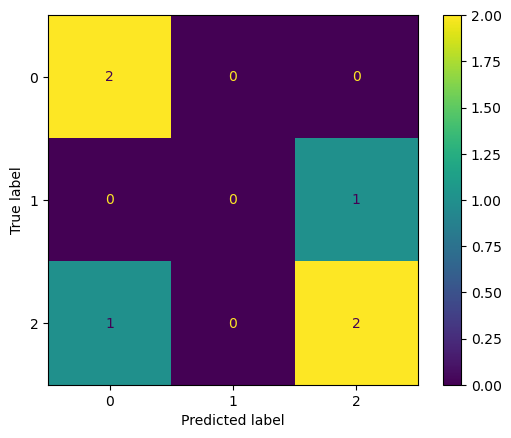

In [31]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm1)
disp.plot()
plt.show()

Anche per questa funzione è possibile specificare il vettore delle labels tramite il parametro *display_labels*, che permette di etichettare correttamente gli assi del plot

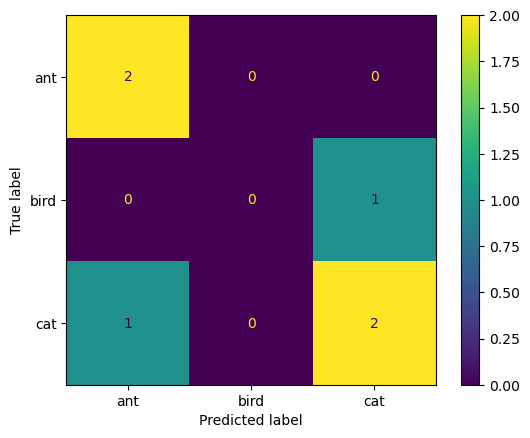

In [32]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=["ant", "bird", "cat"])
disp.plot()
plt.show()

Molto probabilmente il codice che avete scritto per risolvere l'esercizio precedente non funzionerà (siete invitati a provarlo), perchè realizzato per un problema binario e quindi non tiene in considerazione la presenza di matrici di confusione con dimensioni diverse da 2x2. Ma come si gestiscono matrici di confusione di dimensioni differenti? Come si calcolano TP, TN, TP e FN?

Un esempio è mostrato nella figura seguente per la classe "ant".

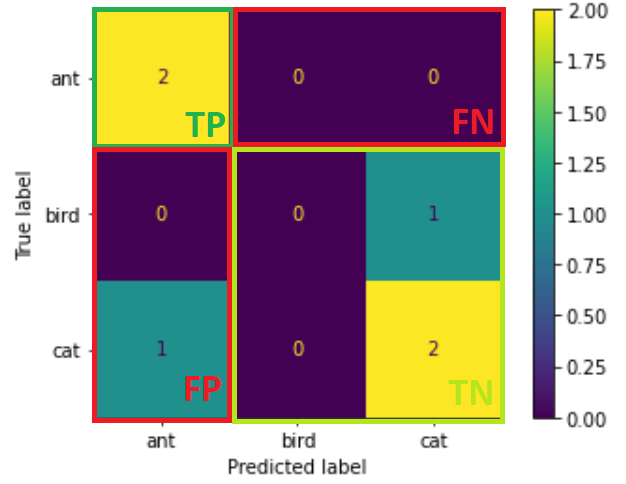

Notate che tale ripartizione vale soltanto per la classe "ant", mentre per le altre classi ("bird", "cat") è necessario definire delle ulteriori ripartizioni. Scikit-learn mette a disposizione una apposita funzione [multilabel_confusion_matrix(...)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.multilabel_confusion_matrix.html#sklearn.metrics.multilabel_confusion_matrix) che accetta in input una serie di parametri, tra questi quelli obbligatori sono la lista di label reali *y_true* e la lista di label predette dal classificatore *y_pred* e opzionalmente è possibile specificare il vettore delle labels.

In [35]:
from sklearn.metrics import multilabel_confusion_matrix
cm3 = multilabel_confusion_matrix(y_true, y_pred, labels=["ant", "bird", "cat"])

Come potete notare questa funzione calcola le matrici di confusione per ogni classe, in quanto i dati sono trattati come se fossero binarizzati con una trasformazione uno-vs-rest. 

## Esercizio 2 (cont'd)
Modificare il codice dell'esercizio 2 in modo che possa essere utilizzato per qualsiasi problema (binario e non) di classificazione, estraendo le metriche per ogni classe e poi mediando il risultato.

In [43]:
def analysis2(cm):
    tpr,tnr,fpr,fnr,p,f = (0,0,0,0,0,0)
    for cmi in cm:
        TP, FN, FP , TN = (cmi[0,0],cmi[0,1],cmi[1,0],cmi[1,1])
        tpr += TP/(TP+FN)
        tnr += TN/(TN+FP)
        fpr += FP/(TN+FP)
        fnr += FN/(TP+FN)
        p += TP/(FP+TP)
        f += (2 * tpr * p) / (p + tpr)
    return [y/len(cm) for y in [tpr,tnr,fpr,fnr,p,f]]

an2 = analysis2(cm3)
print(an2)
an1 = analysis(cm2)
print(an1)


[0.8055555555555555, 0.5555555555555555, 0.4444444444444444, 0.19444444444444442, 0.8333333333333334, 1.7018225500685098]
(0.6666666666666666, 0.3333333333333333, 0.6666666666666666, 0.3333333333333333, 0.5, 0.5714285714285715)


## Esercizio 3
Come abbiamo visto il DummyClassifier non tiene in considerazione il valore degli attributi, ma si basa solamente sui valori delle etichette y per predirre il risultato. Date le caratteristiche del dataset utilizzato è possibile definire un classificaore euristico basato su un valore di soglia l* stimato dagli esempi presenti nel training set. Si implementino una classe per tale classificatore con i metodi di **fit** e **predict** e si calcolino le prestazioni di tale classificator usando le metriche definite in precedenza.

#### Suggerimenti
- per la stima di l* suddividere gli esempi del training set in base alla classe di appartenenza

In [54]:
#Scrivi qui la soluzione
class BetterClassifier:
    def __init__(self):
        soglia = 0
    def fit(self,x,y):
        self.soglia = x.mean()
    def predict(self,x):
        return [int(y>self.soglia) for y in x]

bc = BetterClassifier()
bc.fit(train_x,train_y)
pred2 = bc.predict(test_x)
print(pred2[0:10])
print(test_y[0:10])

an4 = analysis(confusion_matrix(test_y,pred2))
print(an4)
                     


[1, 0, 1, 1, 0, 0, 0, 1, 1, 0]
[1. 0. 1. 1. 0. 0. 0. 1. 1. 0.]
(0.9987888574888979, 0.9916765755053508, 0.008323424494649227, 0.0012111425111021397, 0.9915831663326653, 0.995172968624296)
